In [13]:
import numpy as np
import pickle
import os
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import gseapy as gp

In [14]:
# Define the root directory
name = 'Dataset-ppi--RE-False--W-1--Epochs-5000--D-8--RH-25--LR-0.1--LP-False--CUDA-True'
root = 'D:/study/thesis/project/HBDM-main/ppi_results/models/'+name
# W = True

# load data

## get hierarchical structure of level 1

In [50]:
with open(r'D:\study\thesis\project\HBDM-main\data\datasets\ppi\ppi_index.pkl', 'rb') as f:
    string2node = pickle.load(f)
with open(r'D:\study\thesis\project\HBDM-main\data\datasets\ppi\ppi_name2stringId.pkl', 'rb') as file:
    name2stringId = pickle.load(file)
node2string = {v: k for k, v in string2node.items()}
stringId2name = {v: k for k, v in name2stringId.items()}
# Specify the variable names
# variable_names = ['k_exp_dist','final_idx', 'general_cl_id', 'general_mask']
variable_names = ['k_exp_dist', 'general_cl_id', 'general_mask']
# Initialize a dictionary to store the loaded variables
loaded_variables = {}

# Loop through the variable names and load the data from pickle files
for var_name in variable_names:
    file_path = os.path.join(root, var_name + '.pkl')
    with open(file_path, 'rb') as f:
        loaded_data = pickle.load(f)
    loaded_variables[var_name] = loaded_data

# Access the loaded variables as needed
k_exp_dist = loaded_variables['k_exp_dist']
# final_idx = loaded_variables['final_idx']
general_cl_id = loaded_variables['general_cl_id']
general_mask = loaded_variables['general_mask']

### check data structure

In [16]:
k_exp_dist = np.array(k_exp_dist)
k_exp_dist.shape

(2156, 2156)

In [17]:
level_list = []
# check the cluster ids in different levels
for i in general_cl_id:
    a = list(set(i))
    level_list.append(a)
    print(a[0],a[-1])
    print(len(list(set(i))))

0 9
10
10 29
20
30 69
40
70 149
80
150 307
158
512 511
278
586 1011
426
1012 1467
456
1468 1821
354
1822 1999
178
2048 2047
74
2074 2121
48
2122 2147
26
2148 2155
8


In [18]:
# check nodes in different levels, the position is map to general_cl_id cluster ids
for i in general_mask:
    a = list(set(i))
    print(max(a),min(a))

18757 0
18757 0
18757 0
18757 0
18757 0
18757 0
18757 0
18757 0
18756 0
18739 4
18712 4
18687 4
18630 4
18503 83


### hierchical structure

In [19]:

index_dict = dict()
for i, l in enumerate(general_cl_id):
    for j, cluster in enumerate(l):
        if cluster in index_dict:
            index_dict[cluster].append(general_mask[i][j])
        else:
            index_dict[cluster] = [general_mask[i][j]]

In [20]:
for key, value in index_dict.items():
    print(f"Key: {key}, Value Length: {len(value)}")

Key: 4, Value Length: 2654
Key: 2, Value Length: 3196
Key: 3, Value Length: 1933
Key: 1, Value Length: 2993
Key: 7, Value Length: 833
Key: 8, Value Length: 2249
Key: 5, Value Length: 1159
Key: 6, Value Length: 1299
Key: 9, Value Length: 1578
Key: 0, Value Length: 864
Key: 19, Value Length: 1172
Key: 14, Value Length: 2022
Key: 16, Value Length: 782
Key: 17, Value Length: 1151
Key: 15, Value Length: 1174
Key: 12, Value Length: 2436
Key: 18, Value Length: 1482
Key: 25, Value Length: 648
Key: 27, Value Length: 1211
Key: 21, Value Length: 1001
Key: 13, Value Length: 557
Key: 22, Value Length: 728
Key: 29, Value Length: 1115
Key: 28, Value Length: 463
Key: 23, Value Length: 571
Key: 10, Value Length: 535
Key: 26, Value Length: 1038
Key: 20, Value Length: 158
Key: 24, Value Length: 185
Key: 11, Value Length: 329
Key: 49, Value Length: 867
Key: 38, Value Length: 888
Key: 42, Value Length: 370
Key: 44, Value Length: 646
Key: 40, Value Length: 419
Key: 34, Value Length: 1465
Key: 47, Value Leng

In [21]:
level_dict = dict()
for i in range(len(level_list)):
    if i == len(level_list)-1:
        l = level_list[i]
        for c1 in l:
            level_dict[c1] = []
    else:
        l = level_list[i]
        subl = level_list[i+1]
        # print(l,subl)
        for c1 in l:
            # print(c1)
            for c2 in subl:
                # print(c2)
                if set(index_dict[c1]) & set(index_dict[c2]):
                    # print(c2 ,'in',c1)
                    if c1 in level_dict:
                        level_dict[c1].append(c2)
                    else:
                        level_dict[c1] = [c2]
            if c1 not in level_dict:
                level_dict[c1] = []


In [22]:
len(index_dict) # with all cluster included nodes

2156

In [14]:
# ## get node and cluster
# df = pd.DataFrame({'node':range(18767)})
# for i, level in enumerate(general_cl_id):
#     clusters = list(set(level))
#     col = []
#     ori_index = []
#     colname = 'level_'+str(i+1)
#     for key in clusters:
#         col += len(index_dict[key])*[int(key)]
#         ori_index.extend(index_dict[key])
#     dftemp = pd.DataFrame({'node': ori_index, colname: col})
#     df = df.merge(dftemp,how='left')
# df.to_csv(r'D:\study\thesis\project\HBDM-main\data\ppi4D_cluster.csv',index=False)


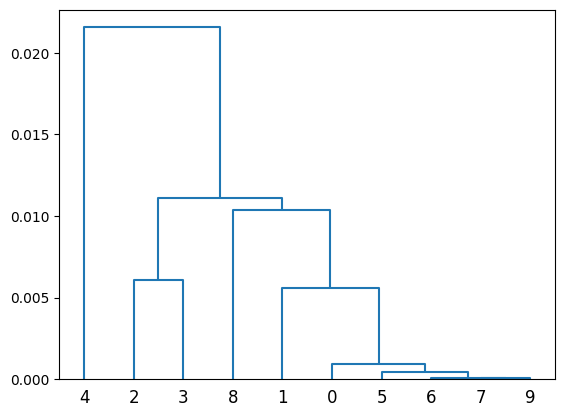

In [23]:

pltroot = 'D:/study/thesis/project/HBDM-main/ppi_results/plots/'

# Create your matrix of within-cluster Euclidean distances
distance_matrix = k_exp_dist[:10,:10]
# distance_matrix = k_exp_dist[30:70,30:70]
# Perform hierarchical clustering
linkage_matrix = sch.linkage(distance_matrix, method='average')
dendrogram = sch.dendrogram(linkage_matrix, color_threshold=0)

# plt.title('Post-Processing Agglomerative Clustering Dendrogram')
# plt.xlabel('Clusters')
# plt.ylabel('Euclidean Distance')
# plt.savefig(pltroot+'Dendrogram-'+name+'.png')
# plt.show()

order = dendrogram['leaves']

In [25]:
G1 = nx.DiGraph()

# Add nodes and edges based on the dictionary
for node, neighbors in level_dict.items():
    G1.add_node(node)
    G1.add_edges_from((node, neighbor) for neighbor in neighbors)

In [26]:
def find_end_nodes(graph, start_node, visited=None):
    if visited is None:
        visited = set()
    visited.add(start_node)
    
    neighbors = list(graph.neighbors(start_node))
    
    # Check if the current node has no outgoing edges
    if not neighbors:
        return [start_node]
    
    end_nodes = []
    for neighbor in neighbors:
        if neighbor not in visited:
            end_nodes.extend(find_end_nodes(graph, neighbor, visited))
    
    return end_nodes

end_orders = []
for i in order:
    start_node = i
    end_nodes = find_end_nodes(G1, start_node)
    end_orders.extend(end_nodes)

index = []
for i in end_orders:
    index.extend(index_dict[i])
len(index)

18758

In [27]:
def find_deep_end_nodes(graph, start_node, depth, current_depth=0, visited=None):
    if visited is None:
        visited = set()
    visited.add(start_node)
    
    neighbors = list(graph.neighbors(start_node))
    
    # Check if the current node is at the desired depth
    if current_depth == depth:
        return [start_node]
    
    deep_end_nodes = []
    for neighbor in neighbors:
        if neighbor not in visited:
            deep_end_nodes.extend(find_deep_end_nodes(graph, neighbor, depth, current_depth + 1, visited))
    
    return deep_end_nodes


depth = 3
end_orders = []
for i in order:
    start_node = i
    end_nodes = find_deep_end_nodes(G1, start_node, depth)
    end_orders.extend(end_nodes)

index = []
for i in end_orders:
    index.extend(index_dict[i])
len(index)

18758

In [19]:
seq = []
c = 0
seq.append(c)
while c in level_dict:
    if level_dict[c] != []:
        seq.append(level_dict[c][0])
        c = level_dict[c][0]

KeyboardInterrupt: 

In [92]:
seq = [0,10,30,70,150,300,558]

In [97]:
import random
random_tests = []
for i in seq:
    print('cluster-'+str(i), 'node number:', len(index_dict[i]))
    random_values = random.sample(range(0, 18766 + 1), len(index_dict[i]))
    random_tests.append(random_values)

cluster-0 node number: 1875
cluster-10 node number: 780
cluster-30 node number: 576
cluster-70 node number: 272
cluster-150 node number: 92
cluster-300 node number: 34
cluster-558 node number: 18


In [21]:

for random_values in random_tests:
    file_path = 'D:/study/thesis/project/HBDM-main/ppi_results/clusters/random_'+str(len(random_values))+'.txt'
    os.makedirs('D:/study/thesis/project/HBDM-main/ppi_results/clusters/random_'+str(len(random_values)))
    with open(file_path, "w") as f:
        for node in random_values:
            protein = stringId2name[f'9606.ENSP{inverted_dict[node]:011}']
            print(f'{protein}', file=f)

NameError: name 'random_tests' is not defined

In [45]:
# # seq = [1979, 2055, 1254, 1729, 1983, 1959, 1971, 1961, 1295, 2070] CAD
# seq = [1287, 1931, 2011, 1961, 1885, 1619, 1959, 1641, 1814, 1358]
# for cluster_id in seq:
#     file_path = 'D:/study/thesis/project/HBDM-main/ppi_results/clusters/'+str(cluster_id)+'.txt'
#     with open(file_path, "w") as f:
#         for node in index_dict[cluster_id]:
#             protein = stringId2name[f'9606.ENSP{inverted_dict[node]:011}']
#             print(f'{protein}', file=f)

    

In [89]:
len(index_dict[27])

1681

# Visualization

## read original adjacency matrix

In [28]:
# if W is True:
#     sparse_i = []
#     sparse_j = []
#     for level in range(1,10):
#         inputfile = 'D:/study/thesis/project/HBDM-main/datasets/ppi/level_'+str(level)
#         sparse_i_level=np.loadtxt(inputfile+'_sparse_i.txt').astype(int)
#         # input data, link column positions with i<j
#         sparse_j_level=np.loadtxt(inputfile+'_sparse_j.txt').astype(int)
#         sparse_i.extend(sparse_i_level)
#         sparse_j.extend(sparse_j_level)
# else:
#     path1=r'D:\study\thesis\project\HBDM-main\datasets\ppi\sparse_i.txt'
#     path2=r'D:\study\thesis\project\HBDM-main\datasets\ppi\sparse_j.txt'
#     # Step 1: Read data from sparse_i and sparse_j files
#     sparse_i = np.loadtxt(path1)
#     sparse_j = np.loadtxt(path2)
#     sparse_i = sparse_i.astype(int)
#     sparse_j = sparse_j.astype(int)

dataroot = 'D:/study/thesis/project/HBDM-main/data/datasets/ppi/'
sparse_i = np.loadtxt(dataroot+'sparse_i.txt')
sparse_j = np.loadtxt(dataroot+'sparse_j.txt')
sparse_w = np.loadtxt(dataroot+'sparse_w.txt')
 
sparse_i = sparse_i.astype(int)
sparse_j = sparse_j.astype(int)
sparse_w = sparse_w.astype(float)
edges_and_weights = zip(sparse_i, sparse_j,sparse_w)
G = nx.Graph()
 
# Use from_edgelist to directly create the graph from edges
G.add_weighted_edges_from(edges_and_weights)


In [ ]:
# ## ad 
# ad = coo_array((57508*[1], (np.concatenate((sparse_i, sparse_j)), np.concatenate((sparse_j, sparse_i)))), shape=(20111, 20111)).toarray()

In [29]:
len(sparse_i)

738800

In [30]:
len(G.nodes)

18758

## adjacency matrix visualization: original vs ordered

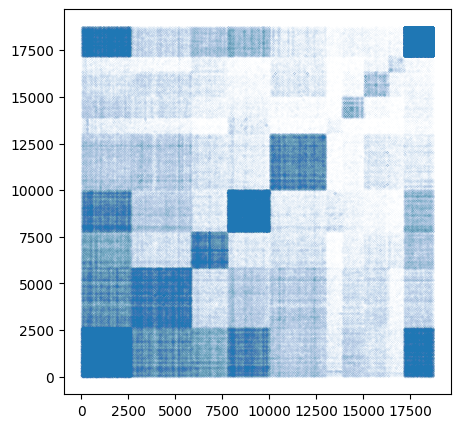

In [48]:
index = []
for i in order:
    index.extend(index_dict[i])
len(index)
ad = nx.to_numpy_array(G, dtype=bool, nodelist=index)
coords = np.argwhere(ad==True)
fig = plt.figure(figsize=(5, 5))
plt.scatter(coords[:,1],coords[:,0],s=0.00005)
plt.savefig(pltroot+'ordered-'+name+'.png')
plt.show()

In [49]:
order

[4, 2, 3, 8, 1, 0, 5, 6, 7, 9]

In [51]:
interest_nodes = index_dict[8]
strings = list(map(node2string.get,interest_nodes))
query_genes = list(map(stringId2name.get,strings))

C:\Users\ZZY\AppData\Local\Temp\ipykernel_54436\121461864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrich_results['Combined Score'].replace(float('inf'), max_value, inplace=True)


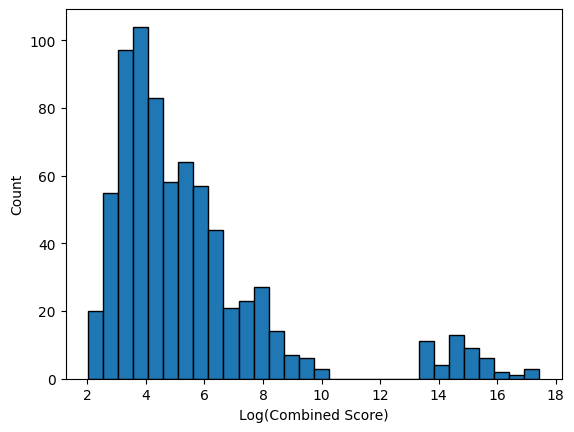

C:\Users\ZZY\AppData\Local\Temp\ipykernel_54436\121461864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrich_results['Combined Score'].replace(float('inf'), max_value, inplace=True)


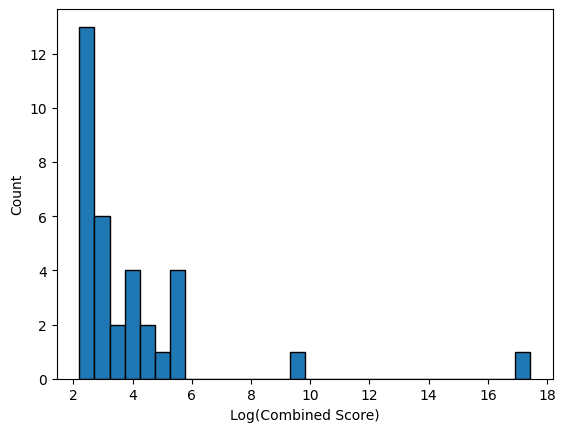

C:\Users\ZZY\AppData\Local\Temp\ipykernel_54436\121461864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrich_results['Combined Score'].replace(float('inf'), max_value, inplace=True)


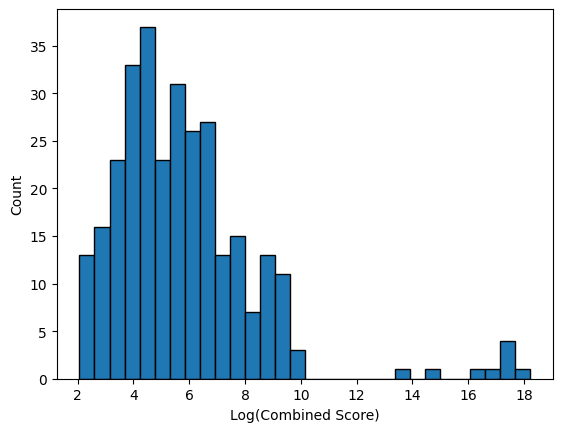

In [88]:
def cluster_gene_enrich(query_genes):
    for database in [['GO_Biological_Process_2021','GO_Cellular_Component_2021','GO_Molecular_Function_2021'],['KEGG_2019_Human'],['Reactome_2022']]:
        enr = gp.enrichr(gene_list=query_genes, # or "./tests/data/gene_list.txt",
                        gene_sets=database,
                        organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                        outdir=None, # don't write to disk
                        )
        enrich_results = enr.results
        enrich_results = enrich_results[enrich_results['P-value']<0.01]
        max_value = enrich_results['Combined Score'].replace(float('inf'), np.nan).max()
        enrich_results['Combined Score'].replace(float('inf'), max_value, inplace=True)
        enrich_results=enrich_results[enrich_results['Combined Score']>1]

        # log_transformed_values = np.log(enrich_results['Odds Ratio'])
        log_transformed_values = np.log(enrich_results['Combined Score'])
        # Create a histogram with log-transformed values
        plt.hist(log_transformed_values, bins=30, edgecolor='black')
        # plt.title('Histogram with Log-Transformed Y-axis')
        plt.xlabel('Log(Combined Score)')
        plt.ylabel('Count')
        plt.show()

In [42]:
depth = 1
end_orders = []
for i in order:
    start_node = i
    end_nodes = find_deep_end_nodes(G1, start_node, depth)
    end_orders.extend(end_nodes)

index = []
for i in end_orders:
    index.extend(index_dict[i])
len(index)

18758

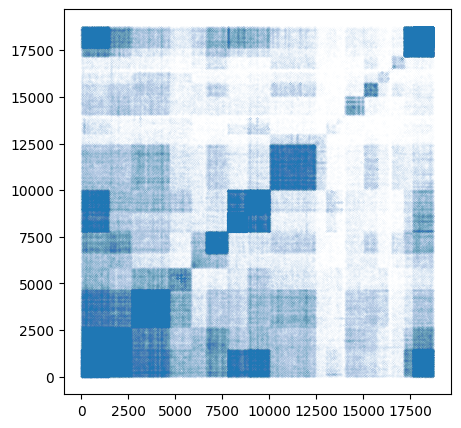

In [43]:
ad = nx.to_numpy_array(G, dtype=bool, nodelist=index)
coords = np.argwhere(ad==True)
fig = plt.figure(figsize=(5, 5))
plt.scatter(coords[:,1],coords[:,0],s=0.00005)
plt.savefig(pltroot+'ordered-'+name+'.png')
plt.show()

In [ ]:
depth = 3
end_orders = []
for i in order:
    start_node = i
    end_nodes = find_deep_end_nodes(G1, start_node, depth)
    end_orders.extend(end_nodes)

index = []
for i in end_orders:
    index.extend(index_dict[i])
len(index)

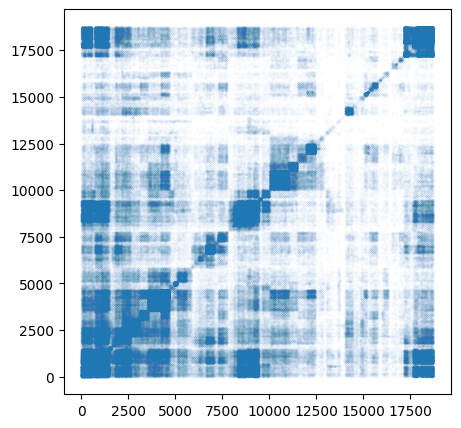

In [41]:
ad = nx.to_numpy_array(G, dtype=bool, nodelist=index)
coords = np.argwhere(ad==True)
fig = plt.figure(figsize=(5, 5))
plt.scatter(coords[:,1],coords[:,0],s=0.00005)
plt.savefig(pltroot+'ordered-'+name+'.png')
plt.show()

In [31]:
adjacency_matrix = nx.to_numpy_array(G, dtype=bool)
coords = np.argwhere(adjacency_matrix==True)
fig = plt.figure(figsize=(5, 5))
plt.scatter(coords[:,1],coords[:,0],s=0.0001)
# plt.savefig(pltroot+name+'.png')
plt.show()


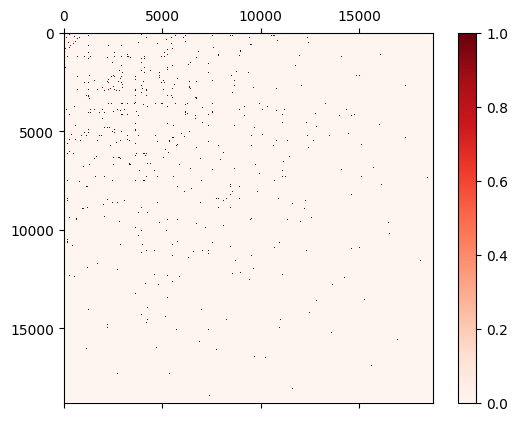

In [37]:
# Get the adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()

# Convert the adjacency matrix to a binary matrix
binary_matrix = adj_matrix > 0

# Plot the binary matrix
fig, ax = plt.subplots()
cax = ax.matshow(binary_matrix, cmap='Reds')


# Display the colorbar
fig.colorbar(cax)

plt.show()

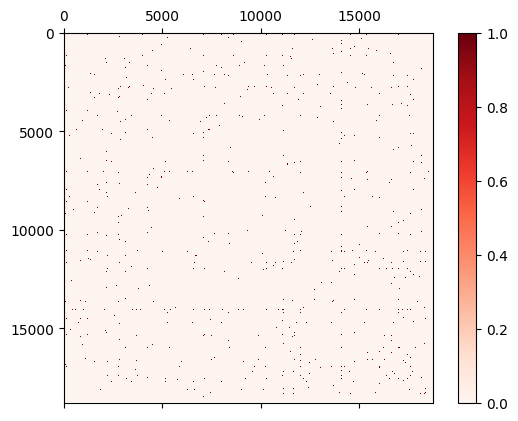

In [38]:
# Get the adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()

adj_matrix_reordered = adj_matrix[np.ix_(index, index)]
binary_matrix = adj_matrix_reordered > 0
# Plot the binary matrix
fig, ax = plt.subplots()
cax = ax.matshow(binary_matrix, cmap='Reds')

# Display the colorbar
fig.colorbar(cax)

plt.show()


## cluster zoom

In [ ]:
def show_cluster(df):
    colors = plt.cm.Paired(np.linspace(0, 1, 10))  # You can choose a different colormap if you prefer

    # Create a color map dictionary
    color_map = {i: colors[i] for i in range(10)}

    # Create a scatter plot
    plt.scatter(df['1d'], df['2d'], c=df['cluster'].map(color_map), cmap='Paired',s=0.1)

    # Add labels and a legend
    plt.xlabel('1d')
    plt.ylabel('2d')

    # Create a legend with labels based on unique clusters
    legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=cluster, 
                                markerfacecolor=color_map[cluster], markersize=10) for cluster in df['cluster'].unique()]
    plt.legend(handles=legend_labels)
    plt.savefig(pltroot+'cluster-'+name+'.png')
    # Show the plot
    plt.show()


In [ ]:
# %matplotlib widget
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# # creating figure
# colors = plt.cm.Paired(np.linspace(0, 1, 10))  # You can choose a different colormap if you prefer

# # Create a color map dictionary
# color_map = {i: colors[i] for i in range(10)}

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# # creating the plot
# plot_geeks = ax.scatter(df['1d'], df['2d'], df['3d'], c=df['cluster'].map(color_map), cmap='Paired',s=0.1)

# # setting title and labels
# ax.set_title("3D plot")
# ax.set_xlabel('x-axis')
# ax.set_ylabel('y-axis')
# ax.set_zlabel('z-axis')

# # Create a legend with labels based on unique clusters
# legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=cluster, 
#                             markerfacecolor=color_map[cluster], markersize=10) for cluster in df['cluster'].unique()]
# plt.legend(handles=legend_labels)

# # displaying the plot
# plt.show()

In [ ]:
# subdf = df[(df['1d'] > -20) & (df['1d'] < 20) & (df['2d'] > -20) & (df['2d'] < 20)]
# show_cluster(subdf)

In [ ]:

# #Plot adjacency matrix in toned-down black and white
# fig = plt.figure(figsize=(5, 5)) # in inches
# plt.imshow(ad,
#                 cmap="Greys",
#                 interpolation='none')

# Test

## choose test dataset

In [12]:
with open(r'D:\study\thesis\project\HBDM-main\data\datasets\ppi\ppi_index.pkl', 'rb') as f:
    value_to_index_mapping = pickle.load(f)
with open(r'D:\study\thesis\project\HBDM-main\data\datasets\ppi\ppi_aliases2stringId.pkl', 'rb') as f:
    ppi_name2stringId = pickle.load(f)
with open(r'D:\study\thesis\project\HBDM-main\data\datasets\ppi\ppi_name2stringId.pkl', 'rb') as file:
    name2stringId = pickle.load(file)
def convert_stringId(alias):
    try:
        stringId = name2stringId[alias]
    except:
        #print(alias, 'can\'t be converted by name2stringId! Now trying aliases2stringId.')
        try:
            stringId = ppi_name2stringId[alias]
        except:
            #print(alias, 'can\'t be converted by aliases2stringId! Now return None.')
            stringId = None
    #print(alias, stringId)
    return stringId

### from STRING-KEGG

In [ ]:
# test_df = pd.read_csv(r'D:\study\thesis\project\HBDM-main\disease\CAD\KEGG Lipid and atherosclerosis.tsv',sep='\t')
# group = set(test_df['#node1'].unique())
# group.update(set(test_df['node2'].unique()))
# group = list(group)

# group_node = []
# for gene in group:
#     stringid = ppi_name2stringId[gene]
#     node = value_to_index_mapping[int(stringid[9:])]
#     group_node.append(node)

### from STRING cluster

In [ ]:
# string_15942=pd.read_csv(r'D:\study\thesis\project\HBDM-main\string module\9606.clusters.proteins.v12.0.txt',sep='\t')
# string_15942 = string_15942[string_15942['cluster_id'] == 'CL:15942']
# group_node = []
# for i in string_15942['protein_id']:
#     node = value_to_index_mapping[int(i[9:])]
#     group_node.append(node)

## label df with given group_node

### check label position in latent space

In [ ]:
# group_df = df[df['node'].isin(group_node)]
# group_df['cluster'].unique()

In [ ]:
# ## get final df: node, cluster, 1d, 2d, label
# df['label'] = df['node'].apply(lambda x: 1 if x in group_node else 0)
# # Set the index to match the values in column 'node'
# df = df.set_index('node')
# # Reset the index to its default integer index
# df = df.reset_index()

In [ ]:
# # def show_positive(df):
# #     # Define the color map
# #     color_map = {0: 'grey', 1: 'red'}

# #     # Create a scatter plot
# #     plt.scatter(df['1d'], df['2d'], c=df['label'].map(color_map), s=0.1, label='Data Points')

# #     # Add labels
# #     plt.xlabel('1d')
# #     plt.ylabel('2d')


# #     # Set plot title
# #     plt.title('Scatter Plot of 1d vs. 2d')

# #     # Show the plot
# #     plt.grid(True)
# #     plt.savefig(pltroot+'positive-'+name+'.png')
# #     plt.show()

# %matplotlib widget

# # creating figure
# color_map = {0: 'grey', 1: 'red'}

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# # creating the plot
# plot_geeks = ax.scatter(df['1d'], df['2d'], df['3d'], c=df['label'].map(color_map), s=0.1, label='Data Points')

# # setting title and labels
# ax.set_title("3D plot")
# ax.set_xlabel('x-axis')
# ax.set_ylabel('y-axis')
# ax.set_zlabel('z-axis')


# # displaying the plot
# plt.show()

In [ ]:
# show_positive(df[(df['1d'] > -20) & (df['1d'] < 20) & (df['2d'] > -20) & (df['2d'] < 20)])
# show_positive(df)

## k nearest neighbor method

In [ ]:
import random
from sklearn.neighbors import KDTree
from sklearn.model_selection import KFold

### for protein complex

In [ ]:
# human_all = pd.read_csv(r'D:\study\thesis\project\HBDM-main\data\complexes\9606.tsv',sep='\t')
protein_names = list(ppi_name2stringId.keys())
protein_names.extend(list(name2stringId.keys()))
# complexs = dict()
# for i in range(len(human_all)):
#     complex_name = human_all.iloc[i]['#Complex ac']
#     names = human_all.iloc[i]['Recommended name']
#     if ',' in names:
#         name_list = names.split(',')
#         for name in name_list:
#             if '-' in name:
#                 par_list = name.split('-')
#                 if len(par_list) > 1:
#                     if all(element in protein_names and len(element)>1 for element in par_list):
#                         # print(par_list)
#                         complexs[complex_name] = par_list
                            
#     elif '-' in names:
#         name = names.split(' ')[0]
#         par_list = name.split('-')
#         if len(par_list) > 1:
#             if all(element in protein_names and len(element)>1 for element in par_list):
#                 # print(par_list)
#                 complexs[complex_name] = par_list

with open(r'D:\study\thesis\project\HBDM-main\data\complexes\complexes.pkl', 'rb') as f:
    complexs = pickle.load(f)

In [ ]:
# complexs = {'RNA':['RPB1', 'RPB2', 'RPB3', 'RPB4', 'RPB5', 'RPB6', 'RPB7', 'RPB8', 'RPB9', 'RPB10', 'RPB11', 'RPB12', 'RPB13'],
#     'protease': ['PSMA1', 'PSMA2', 'PSMA3', 'PSMB1', 'PSMB2', 'PSMB3'],
#     'nuclear pore': ['NUP98', 'NUP93', 'NUP107', 'NUP133']
# }

humans = set(value_to_index_mapping.keys())

complexs_id = dict()

for complex_name in complexs:
    # folder_path = 'D:/study/thesis/project/HBDM-main/ppi_results/test_results/'+complex_name
    # os.mkdir(folder_path)
    group_node = []
    for gene in complexs[complex_name]:
        if gene in protein_names:
            stringid = convert_stringId(gene)
            stringid = int(stringid[9:])
            if stringid in humans:
                node = value_to_index_mapping[stringid]
                group_node.append(node)
    if len(set(group_node)) != 1:
        complexs_id[complex_name] = group_node

In [ ]:
complexs['CPX-2823']

['NUBP1', 'NUBP2']

In [ ]:
complexs_id['CPX-2823']

[3752, 2379]

In [ ]:
# Define your range of k values and leaf_size values
k_values = [20,50]
col1 = []
precision_col_20= []
precision_col_200= []
coverage_col_20=[]
coverage_col_200=[]

for complex_name in complexs_id:
    output_file = 'D:/study/thesis/project/HBDM-main/ppi_results/test_results/'+complex_name+'/'+name+".txt"
    group_node = complexs_id[complex_name]
    col1.append(complex_name)
    precision_list = []
    coverage_list = []

    ## get final df: node, cluster, 1d, 2d, label
    df['label'] = df['node'].apply(lambda x: 1 if x in group_node else 0)
    # Set the index to match the values in column 'node'
    df = df.set_index('node')
    # Reset the index to its default integer index
    df = df.reset_index()    
    # with open(output_file, "w") as f:
    for k in k_values:
        k+=1

        kdtree = KDTree(df[[col for col in df.columns if col.endswith('d')]].to_numpy(), leaf_size=20)

        precision = []
        coverage = []
        for i in group_node:
            true_pre = []
            test_nodes = list(set(group_node)-set([i]))
            given_point = df[df['node']==i][[col for col in df.columns if col.endswith('d')]].to_numpy()
            # Perform a k-NN search to find the k+1 nearest neighbors
            distances, indices = kdtree.query(given_point, k=k)
            # start += (k-1)*[i]
            # dist += distances.reshape(-1).tolist()[1:]
            neighbor = indices.reshape(-1).tolist()[1:]

            for j in neighbor:
                if j in test_nodes:
                    true_pre.append(j)
            precision.append(len(true_pre)/len(neighbor))
            coverage.append(len(set(true_pre))/len(test_nodes))
        precision_list.append(sum(precision)/len(precision))
        coverage_list.append(sum(coverage)/len(coverage))
    precision_col_20.append(precision_list[0])
    precision_col_200.append(precision_list[1])
    coverage_col_20.append(coverage_list[0])
    coverage_col_200.append(coverage_list[1])
            # print(f'k- {k-1} precision: {sum(precision)/len(precision)} coverage: {sum(coverage)/len(coverage)}', file=f)
    # f.write()

In [ ]:
true_pre

[7500]

In [ ]:
result = pd.DataFrame({'complex': col1, 'precision_20':precision_col_20,'precision_50':precision_col_200,'coverage_20':coverage_col_20,'coverage_50':coverage_col_200})
results_name = name +'.csv'
result.to_csv('D:/study/thesis/project/HBDM-main/ppi_results/test_results/complexes/'+results_name,index=False)

### from DisGeNET disease

In [37]:
disease_df = pd.read_csv(r'D:\study\thesis\project\HBDM-main\data\disease\ASCVD.txt',sep='\t')
humans = set(value_to_index_mapping.keys())
protein_names = list(ppi_name2stringId.keys())
protein_names.extend(list(name2stringId.keys()))


group_node = []
for gene in disease_df['Gene']:
    if gene in protein_names:
        stringid = convert_stringId(gene)
        stringid = int(stringid[9:])
        if stringid in humans:
            node = value_to_index_mapping[stringid]
            group_node.append(node)

# output_file = 'D:/study/thesis/project/HBDM-main/ppi_results/test_results/Achondroplasia/'+name+".txt"

## CAD hits occurance cluster

In [39]:
c_col = []
inter_num = []
c_num = []
for c in index_dict:
    inter = set(group_node)&set(index_dict[c])
    if inter:
        c_col.append(c)
        inter_num.append(len(inter))
        c_num.append(len(index_dict[c]))

In [40]:
CAD_hits = pd.DataFrame({'cluster':c_col,'inter_num':inter_num,'c_num':c_num})
CAD_hits['precentage'] = CAD_hits['inter_num']/CAD_hits['c_num']

In [41]:
for level in level_list:
    CAD_hits_sub = CAD_hits[CAD_hits['cluster'].isin(level)]
    print(CAD_hits_sub.sort_values(by='inter_num',ascending=False).head(4))

   cluster  inter_num  c_num  precentage
1        8         64   2850    0.022456
7        3         53   2001    0.026487
5        5         52   2542    0.020456
6        6         45   2150    0.020930
    cluster  inter_num  c_num  precentage
15       20         48   2091    0.022956
11       27         42   1681    0.024985
18       17         42   1564    0.026854
14       14         33   1257    0.026253
    cluster  inter_num  c_num  precentage
39       45         29    814    0.035627
44       50         28    981    0.028542
42       38         25    755    0.033113
30       65         21    892    0.023543
    cluster  inter_num  c_num  precentage
91      110         27    789    0.034221
75      100         17    459    0.037037
71      138         15    354    0.042373
79       86         15    396    0.037879
     cluster  inter_num  c_num  precentage
175      224         15    430    0.034884
160      225         12    359    0.033426
142      253         11    253    0.

In [48]:
CAD_hits_sub = CAD_hits[CAD_hits['cluster'].isin(level_list[8])]

In [49]:
CAD_hits_sub.sort_values(by='inter_num',ascending=False)

,cluster,inter_num,c_num,precentage
915,1641,5,29,0.172414
866,1741,4,44,0.090909
832,1803,4,31,0.129032
886,1712,4,28,0.142857
854,1587,3,20,0.150000
...,...,...,...,...
838,1809,1,16,0.062500
837,1815,1,20,0.050000
836,1667,1,19,0.052632
834,1813,1,15,0.066667


In [47]:
# CAD_hits.sort_values(by='precentage',ascending=False).head(10)['cluster'].tolist()
CAD_hits.sort_values(by='precentage',ascending=False).head(10)

,cluster,inter_num,c_num,precentage
745,1287,4,16,0.250000
954,1931,2,9,0.222222
950,2011,2,9,0.222222
947,1961,4,19,0.210526
906,1885,2,10,0.200000
885,1619,3,16,0.187500
938,1959,2,11,0.181818
915,1641,5,29,0.172414
822,1814,2,12,0.166667
593,1358,2,13,0.153846
